In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore') 
sns.set()

In [4]:
dataset = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')

In [5]:
dataset.rename(columns={'0':'label'}, inplace=True)
# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [6]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")
X.head()

shape: (372450, 784)
culoms count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


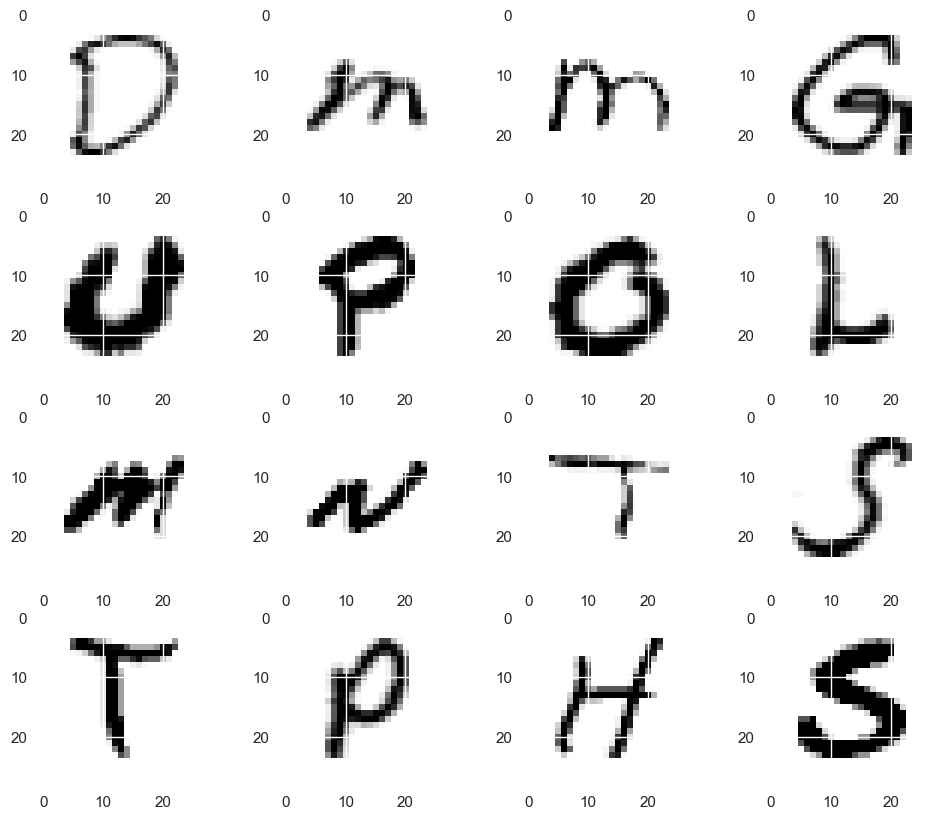

In [7]:
from sklearn.utils import shuffle
X_shuffle = shuffle(X)
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


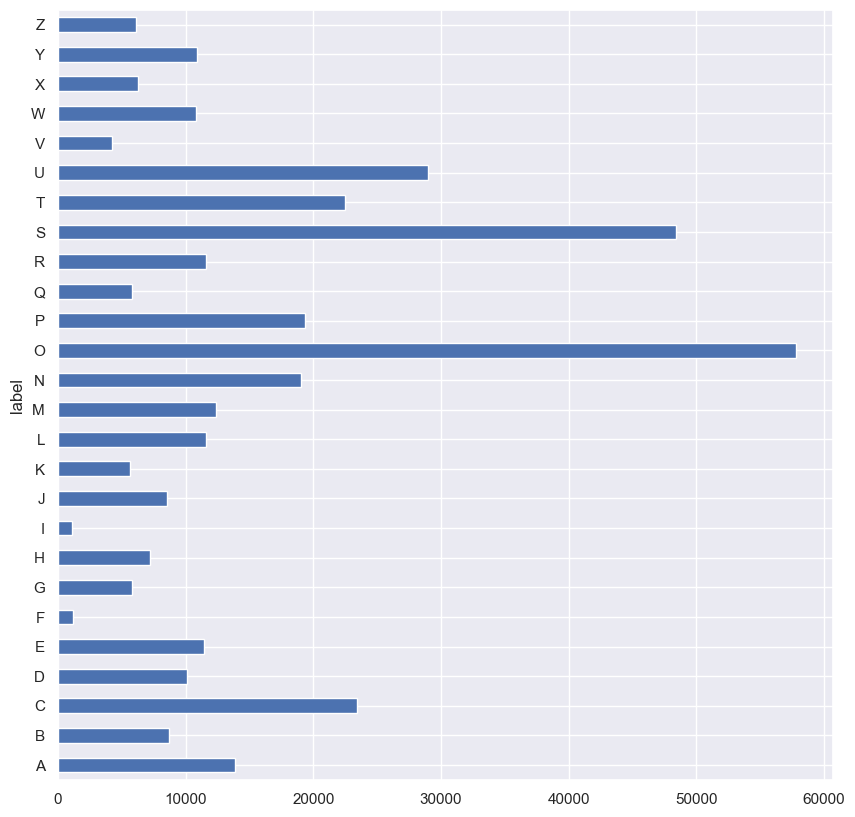

We have very low observations for I and F 
I count: 1120
F count: 1163


In [8]:
print("Amount of each labels")
# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)
label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()
print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

In [9]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)
# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


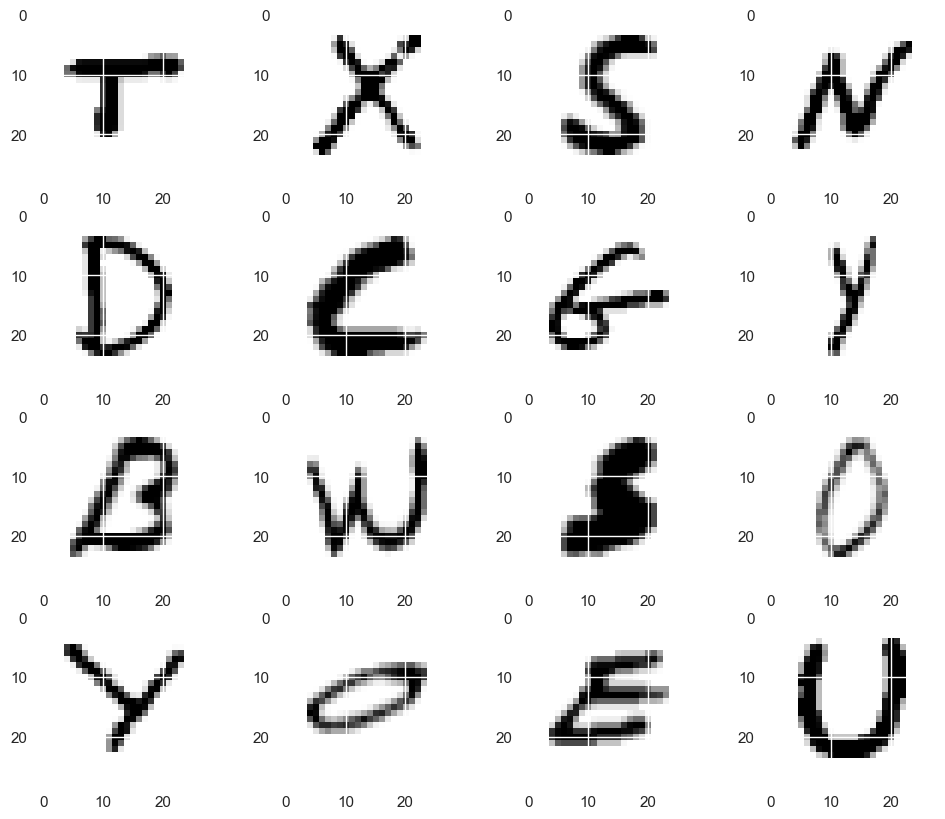

In [10]:
print("Data after scaler")
X_shuffle = shuffle(X_train)
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1397/1397 - 66s - loss: 0.2342 - accuracy: 0.9351 - val_loss: 0.0894 - val_accuracy: 0.9752 - 66s/epoch - 47ms/step
Epoch 2/18
1397/1397 - 67s - loss: 0.0892 - accuracy: 0.9746 - val_loss: 0.0674 - val_accuracy: 0.9817 - 67s/epoch - 48ms/step
Epoch 3/18
1397/1397 - 66s - loss: 0.0678 - accuracy: 0.9808 - val_loss: 0.0611 - val_accuracy: 0.9837 - 66s/epoch - 48ms/step
Epoch 4/18
1397/1397 - 66s - loss: 0.0560 - accuracy: 0.9839 - val_loss: 0.0484 - val_accuracy: 0.9866 - 66s/epoch - 47ms/step
Epoch 5/18
1397/1397 - 68s - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0467 - val_accuracy: 0.9872 - 68s/epoch - 49ms/step
Epoch 6/18
1397/1397 - 67s - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0398 - val_accuracy: 0.9887 - 67s/epoch - 48ms/step
Epoch 7/18
1397/1397 - 65s - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0370 - val_accuracy: 0.9900 - 65s/epoch - 47ms/step
Epoch 8/18
1397/1397 - 64s - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0375 - val_accuracy: 0.9898 - 64s/ep

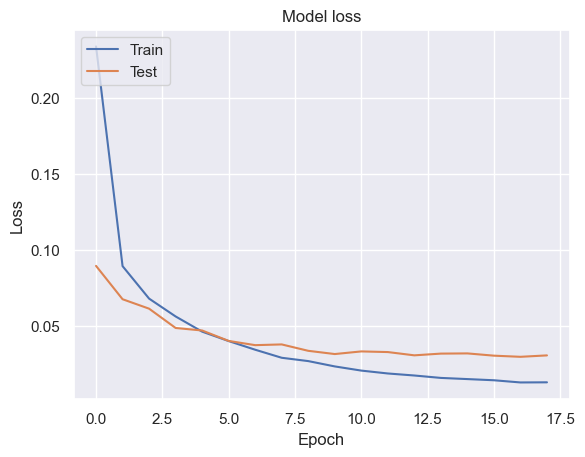

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

2910/2910 [==============================] - 8s 3ms/step


<AxesSubplot: >

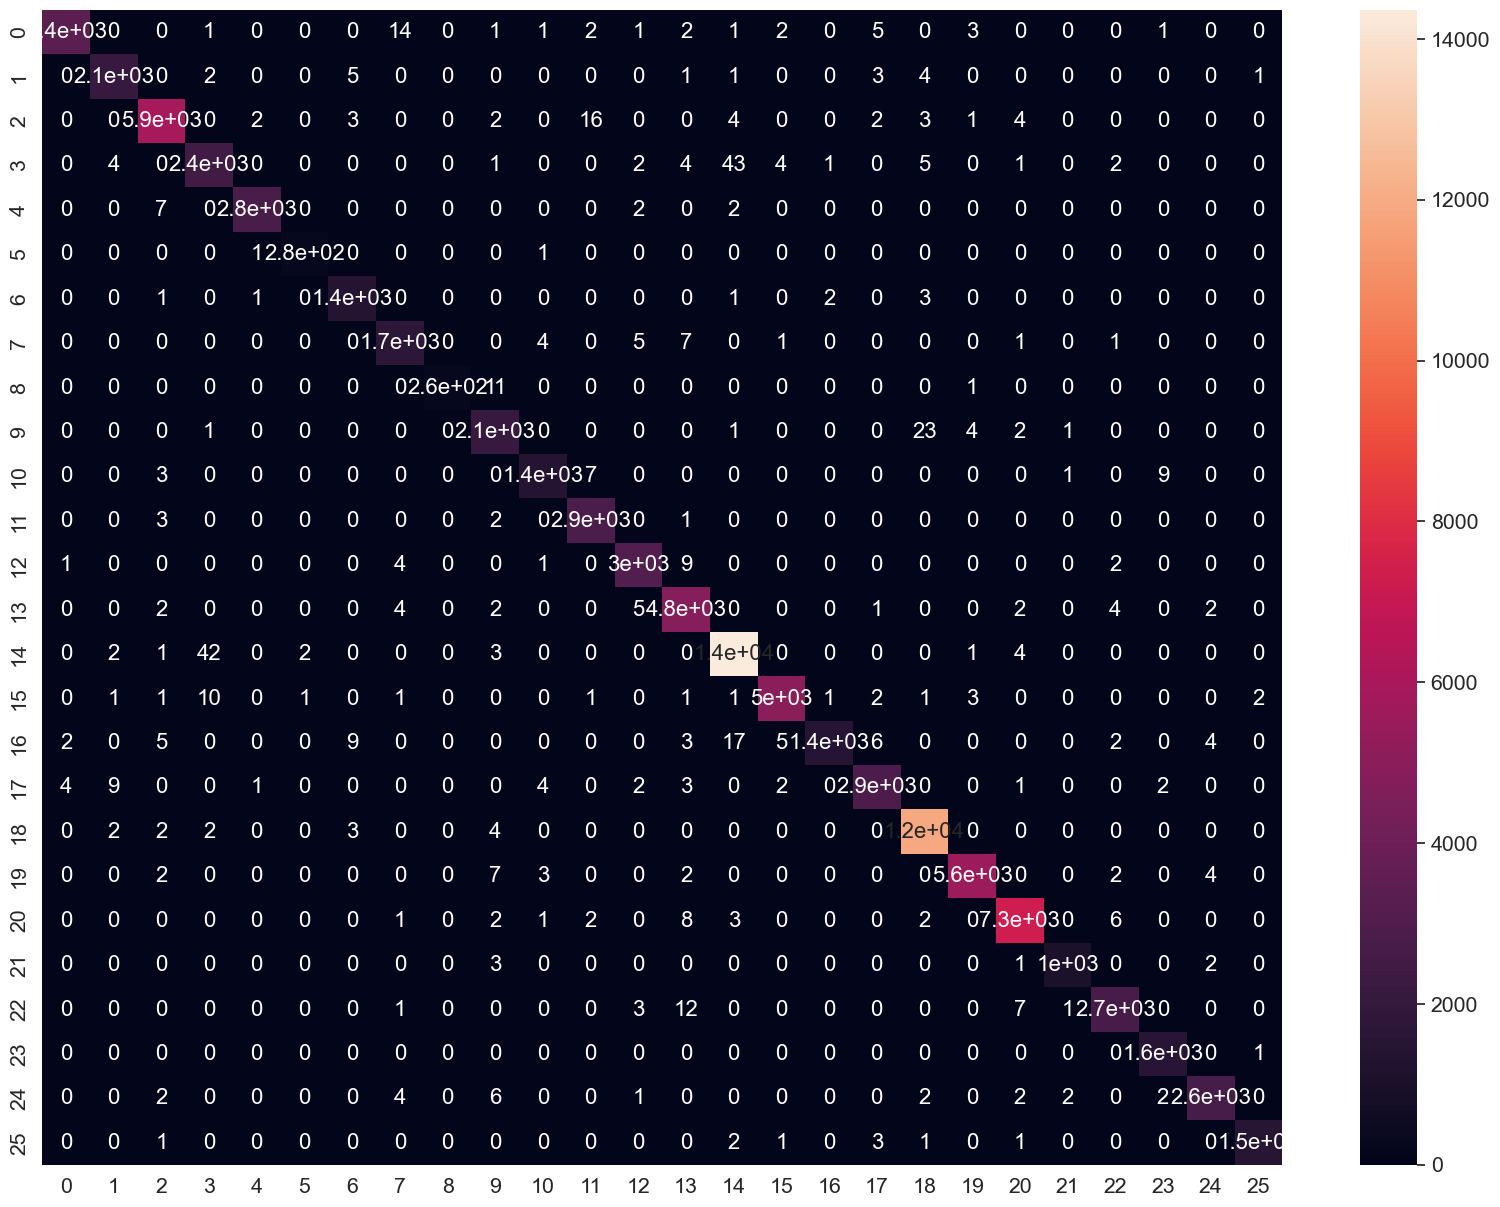

In [15]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [21]:
cls.save('new_model.h5')

In [22]:
from keras.models import load_model
import cv2
import numpy as np

# Load the saved model
model = load_model('my_model.h5')

In [32]:
# Function to preprocess the uploaded image
def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 28x28 pixels
    img_resized = cv2.resize(img, (28, 28))
    # Reshape and normalize the image
    img_processed = img_resized.reshape(1, 28, 28, 1).astype('float32') / 255.0
    return img_processed

# Function to predict using the loaded model
def predict_image(image_path, model):
    # Preprocess the image
    img_processed = preprocess_image(image_path)
    # Make prediction
    prediction = model.predict(img_processed)
    # Get the predicted class
    predicted_class = np.argmax(prediction)
    return predicted_class

In [38]:
image_path = "test.png"
predicted_class = predict_image(image_path, model)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 21ms/step
Predicted class: 14
